<a href="https://colab.research.google.com/github/prititaliya/Linear-Regression/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/Student_Performance.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [5]:
x=df.drop('Performance Index',axis=1)
y=df['Performance Index']

In [ ]:
!pip install ydata-profiling



In [6]:
from ydata_profiling import ProfileReport

In [8]:
ProfileReport(pd.concat([x,y],axis=1))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 6/6 [00:00<00:00, 24.83it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


<Figure size 1000x1000 with 0 Axes>

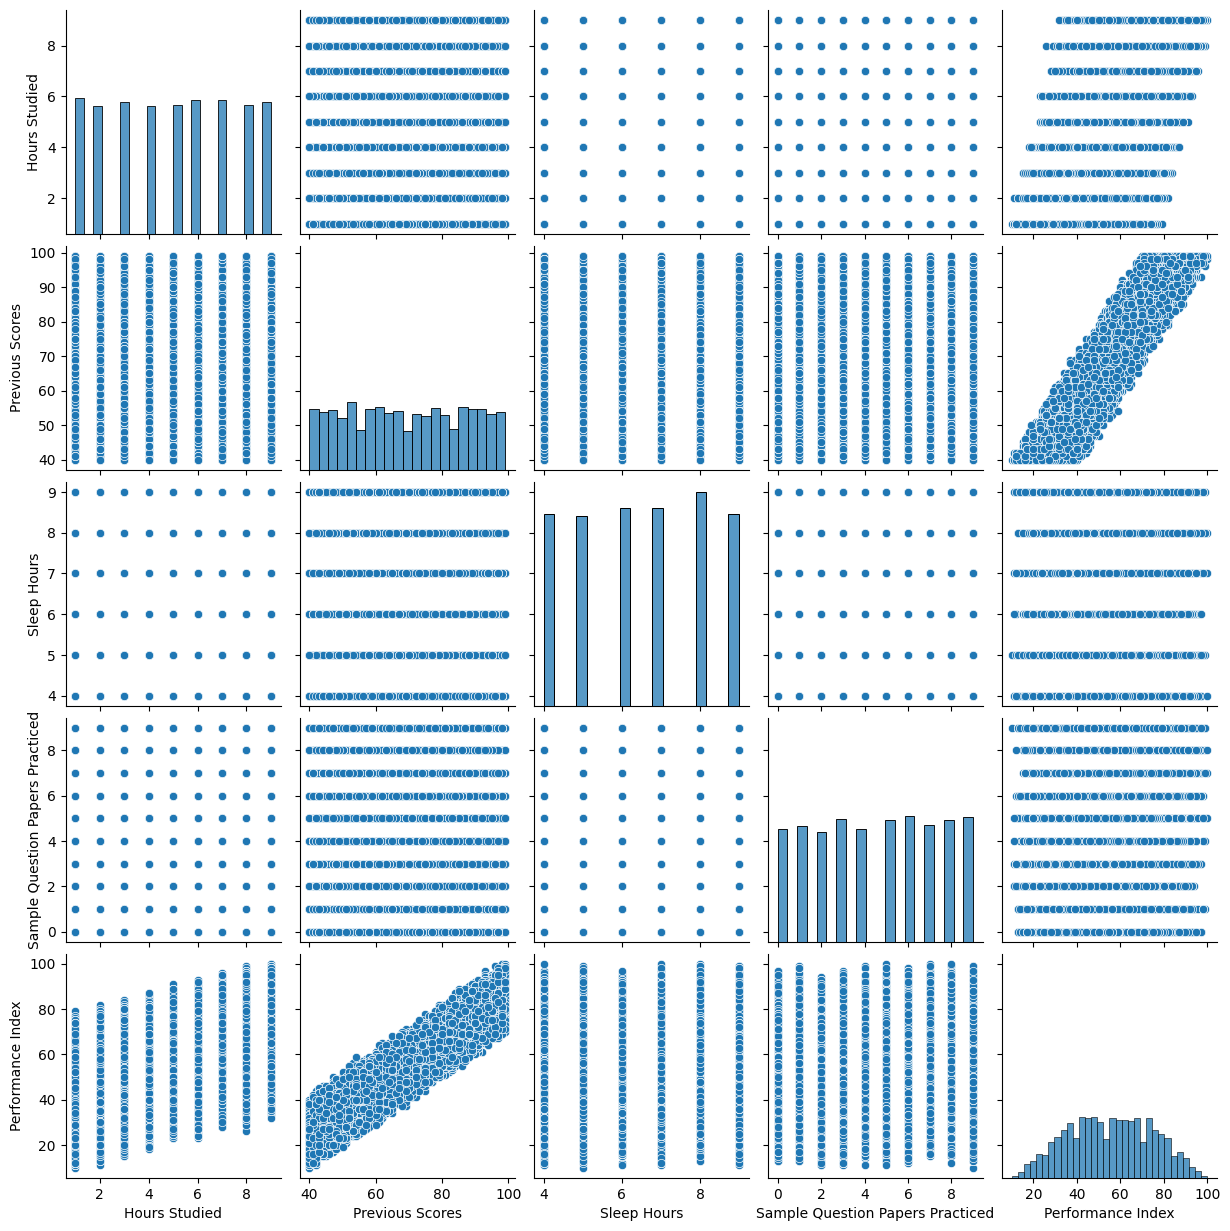

In [10]:
plt.figure(figsize=(10,10))
sns.pairplot(df)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [12]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(drop='first')
ohe.fit(X_train[['Extracurricular Activities']])
X_train['Extracurricular Activities']=ohe.transform(X_train[['Extracurricular Activities']]).toarray()
X_test['Extracurricular Activities']=ohe.transform(X_test[['Extracurricular Activities']]).toarray()



In [27]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [28]:
lr=LinearRegression()
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [29]:
lr.score(X_train_scaled,y_train)

0.9886898790682355

In [30]:
from sklearn.linear_model import Ridge

In [45]:
arr=[]
for i in range(0,1000):
  ridge=Ridge(alpha=i)
  ridge.fit(X_train_scaled,y_train)
  arr.append(ridge.score(X_train_scaled,y_train))

In [48]:
arr.sort(
    reverse=True
)

In [49]:
arr[0]

0.9886898790682355

In [50]:
coef=ridge.coef_
intercept=ridge.intercept_